In [2]:
pip install selenium

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.4 MB 6.3 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.4 MB 6.2 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.4 MB 6.2 MB/s eta 0:00:01
   ---------------------- ----------------- 5.2/9.4 MB 6.2 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.4 MB 6.2 MB/s eta 0:00:01
   --------------------------------- ------ 7.9/9.4 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------  9.2/9.4 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 9.4/9.4 MB 5.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install webdriver-manager

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from selenium import webdriver

In [6]:
driver = webdriver.Chrome()

In [10]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd

In [71]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time

# ✅ Setup
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# ✅ All categories with correct product links
category_links = {
    "Mobiles": "https://www.croma.com/mobiles-smartphones/c/1",
    "Laptops": "https://www.croma.com/laptops/laptops/c/1111",
    "Televisions": "https://www.croma.com/televisions/c/63",
    "Refrigerators": "https://www.croma.com/home-appliances/refrigerators/c/5",
    "Air Conditioners": "https://www.croma.com/home-appliances/air-conditioners/c/3",
    "Washing Machines": "https://www.croma.com/home-appliances/washing-machines/c/4"
}

all_data = []

for category, url in category_links.items():
    print(f"\n🔄 Scraping {category}...")
    driver.get(url)
    time.sleep(5)

    # Scroll down to load content
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(4)

    products = driver.find_elements(By.CSS_SELECTOR, "li.product-item")
    print(f"✅ {category}: {len(products)} products")

    for p in products:
        try:
            title = p.find_element(By.CSS_SELECTOR, "h3.product-title").text
        except:
            title = "N/A"

        # ✅ Try multiple selectors for price
        try:
            price = p.find_element(By.CSS_SELECTOR, "span.new-price").text
        except:
            try:
                price = p.find_element(By.CSS_SELECTOR, "span.amount").text
            except:
                price = "N/A"

        try:
            link = p.find_element(By.TAG_NAME, "a").get_attribute("href")
        except:
            link = "N/A"

        all_data.append({
            "Category": category,
            "Title": title,
            "Price": price,
            "Link": link
        })

# ✅ Close browser
driver.quit()

# ✅ Save to CSV
df = pd.DataFrame(all_data)
df.to_csv("croma_all_categories.csv", index=False)
print("\n📁 Final data saved to croma_all_categories.csv")



🔄 Scraping Mobiles...
✅ Mobiles: 21 products

🔄 Scraping Laptops...
✅ Laptops: 1 products

🔄 Scraping Televisions...
✅ Televisions: 6 products

🔄 Scraping Refrigerators...
✅ Refrigerators: 21 products

🔄 Scraping Air Conditioners...
✅ Air Conditioners: 21 products

🔄 Scraping Washing Machines...
✅ Washing Machines: 1 products

📁 Final data saved to croma_all_categories.csv


#### Price Cleaning (remove ₹ and convert to number)

In [36]:
df.isnull().sum()

Category    0
Title       0
Price       0
Link        0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 0 to 69
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  68 non-null     object
 1   Title     68 non-null     object
 2   Price     68 non-null     object
 3   Link      68 non-null     object
dtypes: object(4)
memory usage: 2.7+ KB


In [79]:
df.head(2)

,Category,Title,Price,Link
0,Mobiles,"vivo Y29 5G (6GB RAM, 128GB, Diamond Black)",15499,https://www.croma.com/vivo-y29-5g-6gb-ram-128g...
1,Mobiles,"vivo Y29 5G (4GB RAM, 128GB, Glacier Blue)",13999,https://www.croma.com/vivo-y29-5g-4gb-ram-128g...


In [73]:
df = df[(df['Title'] != 'N/A') & (df['Price'] != 'N/A') & (df['Link'] != 'N/A')]
df.to_csv('croma_cleaned_products.csv' , index = False)
print(" Cleaned data saved to croma_cleaned_products.csv")

 Cleaned data saved to croma_cleaned_products.csv


In [99]:
import os 
print(os.getcwd())

C:\Users\User\Desktop\Rushikesh Python


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 0 to 69
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  68 non-null     object
 1   Title     68 non-null     object
 2   Price     68 non-null     int32 
 3   Link      68 non-null     object
dtypes: int32(1), object(3)
memory usage: 2.4+ KB


In [75]:
df.isnull().sum()

Category    0
Title       0
Price       0
Link        0
dtype: int64

In [78]:
#Remove ₹ and commas (as string)

df['Price'] = df['Price'].str.replace('₹', '', regex=False)
df['Price'] = df['Price'].str.replace(',', '', regex=False)

In [85]:
df.head(1)

,Category,Title,Price,Link
0,Mobiles,"vivo Y29 5G (6GB RAM, 128GB, Diamond Black)",15499,https://www.croma.com/vivo-y29-5g-6gb-ram-128g...


In [83]:
# string to integer
df['Price'] = df['Price'].astype(int)

In [86]:
# Average price by category
df.groupby('Category')['Price'].mean()

Category
Air Conditioners    82777.952381
Mobiles             30004.666667
Refrigerators       16267.904762
Televisions         39991.800000
Name: Price, dtype: float64

In [88]:
# Count of products per category
df['Category'].value_counts()

Category
Mobiles             21
Refrigerators       21
Air Conditioners    21
Televisions          5
Name: count, dtype: int64

In [90]:
# High price product per category
df.loc[df.groupby('Category')['Price'].idxmax()]

,Category,Title,Price,Link
50,Air Conditioners,Microsoft Surface Pro 11th Edition Wi-Fi Windo...,232990,https://www.croma.com/microsoft-surface-pro-11...
15,Mobiles,"Apple iPhone 16 (128GB, Teal)",73500,https://www.croma.com/apple-iphone-16-128gb-te...
36,Refrigerators,LG 6 in 1 Convertible 1.5 Ton 5 Star Dual Inve...,44990,https://www.croma.com/lg-6-in-1-convertible-1-...
22,Televisions,"SONY Playstation 5 Slim 1TB SSD (CFI-2008A01X,...",54990,https://www.croma.com/sony-playstation-5-slim-...


### Visualize with Matplotlib/Seaborn

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

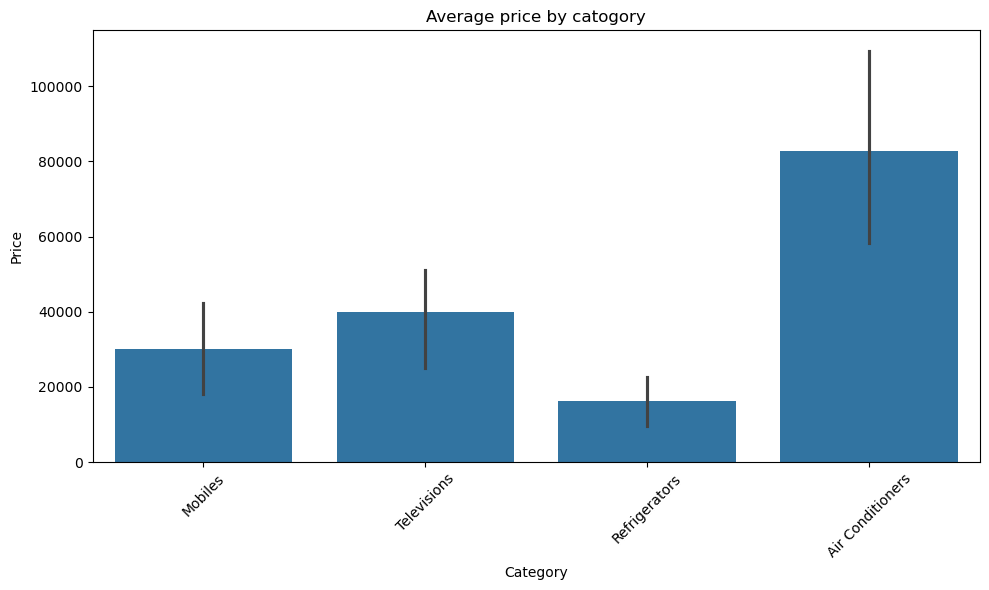

In [94]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Category',y='Price',estimator='mean')
plt.title('Average price by catogory')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()